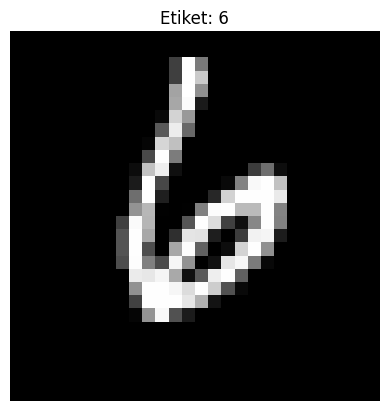

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# CSV dosyasını yükle
df = pd.read_csv("train.csv")

# Özellikler ve etiketler
X = df.drop("label", axis=1).values
y = df["label"].values

# Normalizasyon: 0-255 → 0-1
X = X / 255.0

# Görselleri 28x28x1 formatına getir
X = X.reshape(-1, 28, 28, 1)

# Etiketleri one-hot encode et
y = to_categorical(y, num_classes=10)

# Eğitim ve test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kontrol: örnek görüntü göster
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Etiket: {np.argmax(y_train[0])}")
plt.axis("off")
plt.show()


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# (model kodunu oluştur)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Tekrar derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitim
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# ✅ En güncel formatla kaydet
model.save("digit_model.keras", overwrite=True)


Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8164 - loss: 0.5694 - val_accuracy: 0.9756 - val_loss: 0.0745
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9668 - loss: 0.1110 - val_accuracy: 0.9844 - val_loss: 0.0518
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9762 - loss: 0.0772 - val_accuracy: 0.9874 - val_loss: 0.0447
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9819 - loss: 0.0625 - val_accuracy: 0.9870 - val_loss: 0.0397
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9861 - val_loss: 0.0419


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


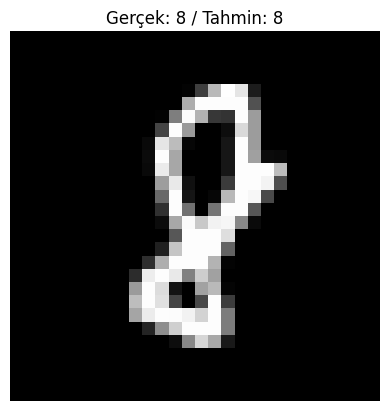

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Test setinden bir örnek al
index = 0
sample = X_test[index]
true_label = np.argmax(y_test[index])

# Model tahmini
prediction = model.predict(np.expand_dims(sample, axis=0))
predicted_label = np.argmax(prediction)

# Görsel ve sonuç
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {true_label} / Tahmin: {predicted_label}")
plt.axis("off")
plt.show()
